## Machine Learning 

In [1]:
#Using SMSSpamCollection dataset in tsv format

In [3]:
#Importing packages 
import numpy as np
import pandas as pd

In [4]:
#Reading the tsv file
dataframe = pd.read_csv("SMSSpamCollection.tsv",sep="\t")

In [6]:
#Show first 5 records
dataframe.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#initializing a list
message_length=[]

for index, row in dataframe.iterrows():
    length_message_text=len(row.message)
    #Add the lenght of each text message to list
    message_length.append(length_message_text)
    
#Alternatively one line
#data["Message Length"]= data["message"].str.len()

In [10]:
message_length

[111,
 29,
 155,
 49,
 61,
 147,
 77,
 160,
 157,
 154,
 109,
 136,
 155,
 196,
 35,
 149,
 26,
 81,
 56,
 155,
 41,
 47,
 52,
 88,
 57,
 144,
 30,
 134,
 75,
 64,
 130,
 189,
 29,
 84,
 158,
 122,
 47,
 28,
 27,
 155,
 82,
 142,
 172,
 19,
 72,
 32,
 45,
 31,
 67,
 148,
 58,
 124,
 80,
 289,
 120,
 76,
 161,
 34,
 22,
 40,
 108,
 48,
 25,
 56,
 110,
 152,
 122,
 159,
 78,
 34,
 46,
 29,
 45,
 42,
 20,
 43,
 73,
 50,
 42,
 76,
 22,
 32,
 32,
 36,
 14,
 55,
 121,
 144,
 42,
 41,
 58,
 195,
 141,
 137,
 107,
 158,
 33,
 51,
 178,
 31,
 57,
 81,
 76,
 160,
 183,
 44,
 95,
 43,
 82,
 115,
 30,
 40,
 31,
 96,
 158,
 143,
 156,
 152,
 72,
 86,
 144,
 156,
 53,
 156,
 52,
 38,
 20,
 244,
 22,
 107,
 28,
 9,
 39,
 25,
 125,
 162,
 38,
 34,
 46,
 155,
 85,
 33,
 27,
 156,
 42,
 25,
 48,
 159,
 84,
 33,
 30,
 45,
 59,
 25,
 160,
 384,
 28,
 27,
 157,
 124,
 145,
 115,
 64,
 85,
 152,
 155,
 51,
 156,
 74,
 67,
 59,
 50,
 94,
 33,
 105,
 61,
 65,
 26,
 146,
 66,
 126,
 159,
 23,
 65,
 24,
 26,
 1

In [12]:
#Assigning lengths to new column named length
dataframe["length"]=message_length

In [13]:
dataframe.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
dataframe.tail()

,label,message,length
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125
5571,ham,Rofl. Its true to its name,26


In [15]:
dataframe.isnull()

,label,message,length
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [17]:
# If 1 is available , then there are missing values
dataframe.isnull().sum()

label      0
message    0
length     0
dtype: int64

In [18]:
#total data
len(dataframe)

5572

In [21]:
#Check proportion of ham & spam
dataframe["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [23]:
#Dataframe Overview of length column
dataframe["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [24]:
#Lists for ham & spam data
ham_data=[]
spam_data=[]

for index,row in dataframe.iterrows():
    #is leabelled data=ham
    if row["label"]=="ham":
        ham_data.append(row)
    else:
        spam_data.append(row)

# Convert each list to dataframes
ham_dataframe=pd.DataFrame(ham_data)
spam_dataframe=pd.DataFrame(spam_data)


In [28]:
ham_dataframe.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [29]:
ham_dataframe["length"].describe()

count    4825.000000
mean       71.482487
std        58.440652
min         2.000000
25%        33.000000
50%        52.000000
75%        93.000000
max       910.000000
Name: length, dtype: float64

In [30]:
spam_dataframe["length"].describe()

count    747.000000
mean     138.670683
std       28.873603
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: length, dtype: float64

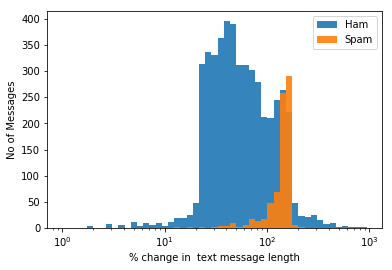

In [35]:
#Plotting 

import matplotlib.pyplot as mat_plot_lib

#Enable the inline backend for usage within the Python notebook
%matplotlib inline

mat_plot_lib.xscale('log')
mat_plot_lib.xlabel("% change in  text message length")
mat_plot_lib.ylabel("No of Messages")

bins= 1.15**(np.arange(0,50))

mat_plot_lib.hist(dataframe[dataframe["label"]=="ham"] ["length"],bins=bins,alpha=0.9)
mat_plot_lib.hist(dataframe[dataframe["label"]=="spam"] ["length"],bins=bins,alpha=0.9)

mat_plot_lib.legend(["Ham","Spam"])
mat_plot_lib.show()